<a href="https://colab.research.google.com/github/akhunzakp/Machine-Learning2025/blob/main/JS13_TG19_2341720259_Yuma_Akhunza_K_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 13**
# Artificial Neural Network

Nama : Yuma Akhunza Kausar Putra

NIM : 2341720259

Absen : 19

# Lab 1

Iris Flower Classification with Perceptron

Description
In this lab, you will be asked to classify irises using a perceptron model. You can use the iris dataset from the previous lab.

To increase your understanding regarding the Perceptron model, in this practical you will create a Perceptron model without using a library.

## Step 1 - Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

## Step 2 - Load Data and Visualization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


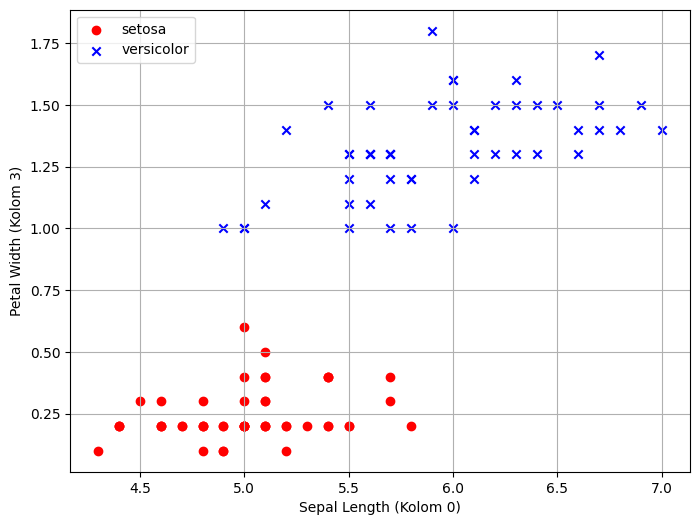

In [3]:
# Memuat data dari 'iris (1).csv', melewati baris header (skiprows=1)
# dan memastikan penamaan kolom dengan indeks 0 hingga 4 (header=None).
df = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/iris.csv', header=None, skiprows=1)

# Mengonversi kolom fitur (0, 1, 2, 3) ke tipe data numerik.
for col in [0, 1, 2, 3]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Visualisasi Data (Sama seperti kode asli) ---
# Kolom 0: Sepal Length, Kolom 3: Petal Width (digunakan di sini karena hasilnya lebih jelas)
setosa = df[df[4] == 'setosa'] # Perhatikan: label mungkin 'setosa' atau 'Iris-setosa'
versicolor = df[df[4] == 'versicolor']

# Jika data Anda memiliki label 'Iris-setosa' dan 'Iris-versicolor', gunakan:
# setosa = df[df[4] == 'Iris-setosa']
# versicolor = df[df[4] == 'Iris-versicolor']

a, b = 0, 3
plt.figure(figsize=(8, 6))
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Sepal Length (Kolom 0)')
plt.ylabel('Petal Width (Kolom 3)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Step 3 - Creating a Perceptron Class

In [4]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Step 4 - Select Data and Label Encoding

In [5]:
# Pilih 100 data awal (Setosa dan Versicolor)
y = df.iloc[0:100, 4].values

# Encoding Label: Iris-setosa menjadi -1, Iris-versicolor menjadi 1
y = np.where(y == 'Iris-setosa', -1, 1)

# Pilih fitur data latih (Sepal Length: kolom 0 dan Petal Width: kolom 3)
X = df.iloc[0:100, [0, 3]].values

## Step 5 - Fitting the Model

In [6]:
# Inisialisasi dan training model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

print(f"Bobot Akhir (w0, w1, w2): {ppn.w_}")
print(f"Error per Epoch: {ppn.errors_}")

Bobot Akhir (w0, w1, w2): [0. 0. 0.]
Error per Epoch: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Step 6 - Visualizing Error Values ​​Per Epoch

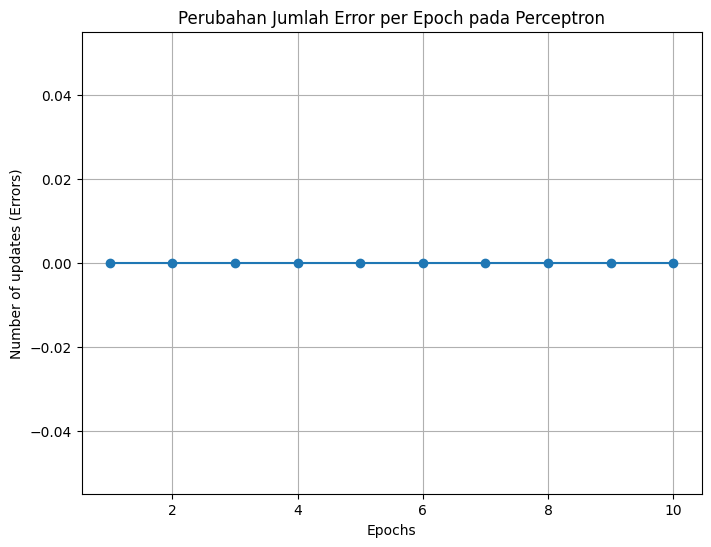

In [7]:
# --- Langkah 6 (Visualisasi Nilai Error Per Epoch) ---
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Errors)')
plt.title('Perubahan Jumlah Error per Epoch pada Perceptron')
plt.grid()
plt.savefig('perceptron_errors_vs_epochs.png')

## Step 7 - Decision Boundary Visualization

Decision boundary results,

/tmp/ipython-input-391121737.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


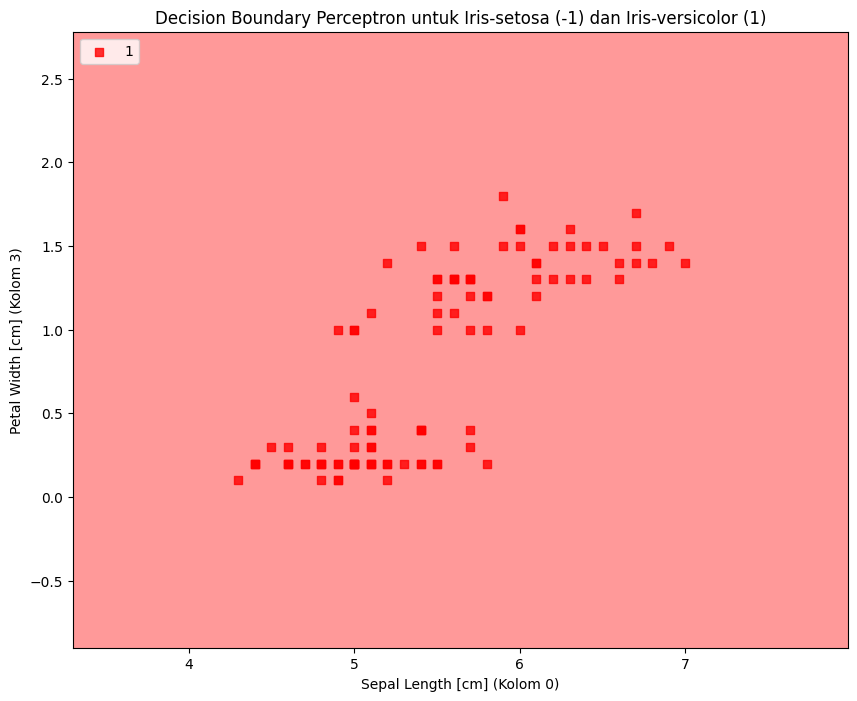

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# --- Langkah 7 - Membuat Fungsi plot_decision_regions ---
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    # Menggunakan np.unique(y) untuk menentukan jumlah kelas dan warna yang dibutuhkan
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        # Mapping label -1 ke index 0 (merah) dan 1 ke index 1 (biru)
        # c=cmap(i) menggunakan index i dari cmap
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# --- Memanggil Fungsi untuk Visualisasi Decision Boundary ---
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm] (Kolom 0)')
plt.ylabel('Petal Width [cm] (Kolom 3)')
plt.title('Decision Boundary Perceptron untuk Iris-setosa (-1) dan Iris-versicolor (1)')
plt.legend(loc='upper left')
plt.savefig('perceptron_decision_boundary.png')


# Lab 2

XOR Logic Value with MLP

Description
In this simple case, you will use MLP to obtain a binary value that is operated with XOR logic . Keep in mind that XOR is different from OR, XOR will only be true if one of the values ​​is true, not both or

## Step 1 - Import Library

In [9]:
from sklearn.neural_network import MLPClassifier

## Step 2 - Create Data

In [10]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

## Step 3 - Fit Model

In [11]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

## Step 4 - Prediction

Results,





In [12]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Lab 3

Churn Rate Classification with ANN

Description
In this lab, you'll be asked to create an ANN model to classify a customer's likelihood of leaving your company. This phenomenon is commonly referred to as ' churn '. A high churn rate negatively impacts a company.

Dataset

⚠️ Attention! ⚠️
In this lab, you'll be using a library tensorflowfrom Google. Therefore, you'll need to install it tensorflowfirst.

You also need to adjust the tensorflow installation you are using on your local computer, whether computing on,

CPU

GPU (GPU support CUDA)

Apple Silicon

Installation guide,

https://www.tensorflow.org/install

https://developer.apple.com/metal/tensorflow-plugin/

## Data Pre-Processing

## Step 1 - Import Library

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Step 2 - Load Data

In [14]:
dataset = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Check data (X)

In [15]:
print(X)


[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


## Step 3 - Categorical Data Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [17]:
print(X)


[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


## Step 4 - Encoding the "Geography" Column with One Hot Encoder

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Check the data (X) by printing. The result is,

In [19]:
print(X)


[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


## Step 5 - Split Data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Step 6 - Scaling Features

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating an ANN Model

## Step 1 - ANN Model Initiation

In [22]:
ann = tf.keras.models.Sequential()

## Step 2 - Creating the First Input Layer and Hidden Layer

In [23]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Step 3 - Creating the Second Hidden Layer

In [24]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Step 4 - Creating the Output Layer

In [25]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training Model

## Step 1 - Compile Model (Unify Architecture) ANN

In [26]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Step 2 - Fitting the Model

In [27]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5694 - loss: 0.6797
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7914 - loss: 0.4976
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.4482
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8066 - loss: 0.4265
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8229 - loss: 0.4150
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8229 - loss: 0.4085
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8278 - loss: 0.3999
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.3980
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8272 - loss: 0.3969
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8340 - loss: 0.3820
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8283 - loss: 0.3924
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Making Predictions
Given the following information,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Is it necessary to retain that customer?

## Model New Data and Make Predictions

Is the result False ?

In [28]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
[[False]]


## Prediction with Testing Data

In [29]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Check Accuracy and Confusion Matrix

Results (may vary),

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1514   81]
 [ 191  214]]


0.864


# Lab 4
Classification of Day and Night with ANN

Introduction
In this lab, students will learn how to build a day and night image classification model using an Artificial Neural Network (ANN) . The model will be trained using the HOG (Histogram of Oriented Gradients) feature extracted from the image. Students will go through the complete flow, from data acquisition, image preprocessing, feature extraction, normalization, model construction, and evaluation.

Dataset
Use the day and night image dataset in Lab 5

## Step 1 - Import Library
Import the required libraries

In [31]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

## Step 2 - Load Dataset
Use the following function and load the dataset. Make sure the dataset directory is correct.

In [36]:
# Load images and labels from a directory structure
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []
    for folder in p.glob('*'):
        label = folder.name
        for file in folder.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))
    return img_list

train_dir = "/content/drive/MyDrive/Yuma Akhunza Kausar Putra/images/images/training"
test_dir  = "/content/drive/MyDrive/Yuma Akhunza Kausar Putra/images/images/test"

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

## Step 2 - Pre-Processing
Resize and label data

In [39]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

## Step 3 - Feature Extraction
Next, perform the feature extraction process. The feature we will use is HoG. Learn more about HoG at https://scikit-image.org/docs/0.25.x/auto_examples/features_detection/plot_hog.html

In [38]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8,8),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

## Step 4 - Feature Standardization

In [46]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

## Step 5 - Create Training and Validation Data

In [47]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

# Convert label ke numpy array
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

## Step 6 - Create an ANN Model

The model architecture used is,

Input Layer

Hidden Layer 1 - 128 Nodes - ReLU

Hidden Layer 2 - 64 Nodes - ReLu

Output Layer - 2 Nodes - Sigmoid

In [48]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

## Step 7 - Train the Model

In [49]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.6437 - loss: 1.0175 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0154
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9792 - val_loss: 0.0430
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 1.0000 - loss: 1.0714e-05 - val_accuracy: 0.9792 - val_loss: 0.0645
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 1.0000 - loss: 5.4760e-06 - val_accuracy: 0.9792 - val_loss: 0.0754
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 1.0000 - loss: 8.8664e-06 - val_accuracy: 0.9792 - val_loss: 0.0810
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 1.0000 - loss: 3.2420e-06 - val_accuracy: 0.9792 - val_loss: 0.0833
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 1.0000 - loss: 5.5708e-06 - val_accuracy: 0.979

You can re-access the model performance by using the variables historythat have been created.

## Step 8 - Evaluate the Model with Test Data

In [50]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Akurasi Test:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8898 - loss: 1.9212
Akurasi Test: 0.8999999761581421


## Step 9 - Create a Model Performance Report

In [51]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.93      0.86      0.90        80
           1       0.87      0.94      0.90        80

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160

[[69 11]
 [ 5 75]]


## Step 10 - Visualizing the Training Process
This visualization is essential for monitoring model performance. It uses the Receiver Operating Characteristic (ROC) concept to determine model performance at each epoch.

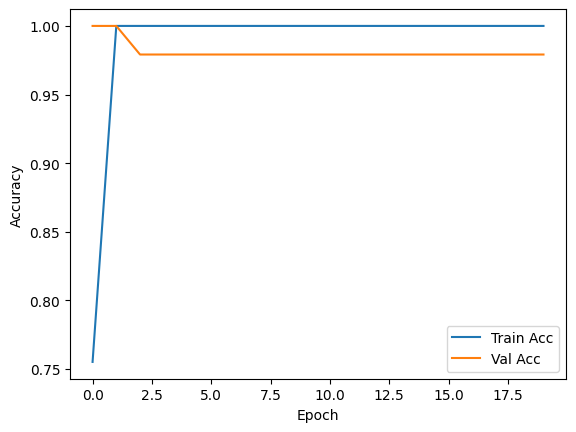

In [52]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the graph, what can you interpret?

Data Preprocessing and Graph Interpretation:

- The graph shows that both lines (Train Acc and Val Acc) spike and stabilize at very high values ​​(close to 1.0) after the second epoch.

- The gap between the two lines is very small. This indicates that the model performs very well and does not suffer from significant overfitting on this data.

- The rapid convergence indicates that the HOG features are a very effective representation for this classification task. Step 1 - Import Library

## Step 11 - Save the Model
Save the model for production purposes.

In [53]:
model.save('day_night_classifier_model.h5')


# Lab Assignment
- Perform classification on MNIST data using ANN model
- You are allowed to explore,
    - Pre-processing methods
    - Feature selection
    - ANN Architecture
    - Activation Function
- ANN is implemented using tensorflow.

## Step 1: Preparation and Importing Libraries
We start by importing the required libraries, including TensorFlow for the ANN model and NumPy for array operations.

In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Explore MNIST Data
The MNIST dataset is already available within the Keras library, making it easy to load.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Bentuk data latih: (60000, 28, 28)
Bentuk label latih: (60000,)
Bentuk data uji: (10000, 28, 28)
Bentuk label uji: (10000,)


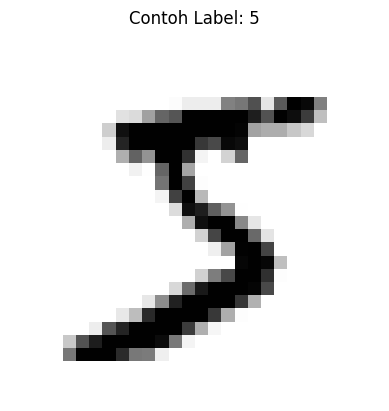

In [55]:
# Memuat data MNIST
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Eksplorasi bentuk data
print(f"Bentuk data latih: {X_train_full.shape}")
print(f"Bentuk label latih: {y_train_full.shape}")
print(f"Bentuk data uji: {X_test.shape}")
print(f"Bentuk label uji: {y_test.shape}")

# Tampilkan contoh citra pertama
plt.imshow(X_train_full[0], cmap="binary")
plt.title(f"Contoh Label: {y_train_full[0]}")
plt.axis('off')
plt.show()

Note: The MNIST dataset consists of 60,000 training images and 10,000 test images. Each image is 28x28 pixels in size.

## Step 3: Data Preprocessing
This step is key to preparing the data for use with the ANN model.

3A. Normalization
Pixel values ​​in the image range from 0 (black) to 255 (white). We need to normalize these values ​​to the range 0 to 1.

In [56]:
# Normalisasi: Mengubah tipe data ke float dan membagi dengan 255
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## 3B. One-Hot Label Encoding
Since this is a multi-class classification task (10 classes, 0-9), we use One-Hot Encoding for the target labels.

In [57]:
# One-Hot Encoding Label: 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
num_classes = 10
y_train_encoded = to_categorical(y_train_full, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

## 3C. Training & Validation Data Separation
The training dataset is further divided into the main training dataset and the validation dataset to monitor performance during training.

In [58]:
# Pisahkan 5000 citra untuk data validasi
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_encoded,
    test_size=5000,
    random_state=42
)

## Step 4: Creating the ANN Model Architecture
We will build a Sequential ANN model with Fully Connected Layers (Dense).

Architecture Exploration & Activation Function:

- Input Layer: The 28x28 image must be flattened into a vector of 784 features (28 * 28).

- Hidden Layers: Two hidden layers are used with the ReLU (Rectified Linear Unit) activation function, which is popular for its computational efficiency and avoids the problem of vanishing gradients.

- Output Layer: Must have 10 nodes (according to the number of classes), with a Softmax activation function to generate the probabilities for each class.

In [59]:
# Dapatkan dimensi input (28x28 = 784)
input_shape = (28, 28)

model = Sequential([
    # Layer 1: Flatten (membuat input 2D menjadi vektor 1D)
    Flatten(input_shape=input_shape),

    # Layer 2: Hidden Layer 1 - 256 Nodes (DENSE)
    Dense(256, activation='relu'),

    # Layer 3: Hidden Layer 2 - 128 Nodes (DENSE)
    Dense(128, activation='relu'),

    # Layer 4: Output Layer - 10 Nodes (DENSE) dengan Softmax
    Dense(num_classes, activation='softmax')
])

# Kompilasi Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # Cocok untuk One-Hot Encoding
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Model Training
The model is trained using the training data and evaluated on the validation data.

In [60]:
# Melatih model
history = model.fit(
    X_train, y_train,
    epochs=10, # Jumlah perulangan pelatihan
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8815 - loss: 0.3880 - val_accuracy: 0.9556 - val_loss: 0.1368
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9711 - loss: 0.0931 - val_accuracy: 0.9736 - val_loss: 0.0808
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9817 - loss: 0.0579 - val_accuracy: 0.9736 - val_loss: 0.0913
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9866 - loss: 0.0425 - val_accuracy: 0.9742 - val_loss: 0.0902
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9800 - val_loss: 0.0698
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9802 - val_loss: 0.0743
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.9786 - val_loss: 0.0768
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9947 - loss: 0

## Step 6: Model Evaluation
The model is tested on test data (X_test) that the model has never seen during training.

In [61]:
# Evaluasi pada data uji
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f"\nAkurasi Test Akhir: {test_acc:.4f}")

# Membuat prediksi
y_pred_encoded = model.predict(X_test)
# Konversi kembali dari one-hot encoding ke label kelas
y_pred = np.argmax(y_pred_encoded, axis=1)

313/313 - 1s - 4ms/step - accuracy: 0.9755 - loss: 0.1056

Akurasi Test Akhir: 0.9755
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Performance Report
Displays detailed performance metrics using the classification_report and confusion_matrix.

In [62]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.95      0.97       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Confusion Matrix:
[[ 973    0    3    0    0    1    1    1    1    0]
 [   0 1116    1    3    0    1    4    1    9    0]
 [   6    0 1004   10    1    0    2    5    3    1]
 [   0    0    2  995    0    6    0   

## Step 7: Visualize the Training Process
Visualize the loss and accuracy during each training epoch to monitor overfitting or underfitting.

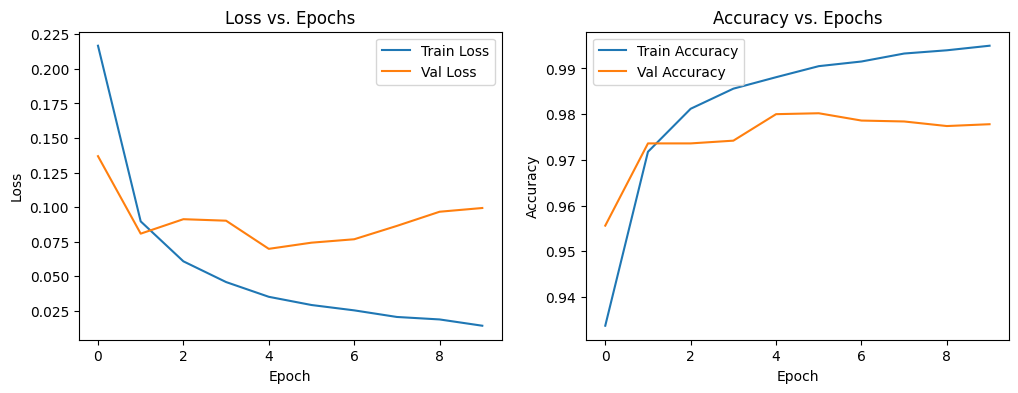

In [63]:
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Final Task

### Subtask:
Summarize the key findings from the MNIST classification, including the achieved accuracy and any observations about the model's performance.


## Summary:

### Data Analysis Key Findings

*   The model achieved a **Test Loss of 0.0843** on the test dataset.
*   The **Test Accuracy was 0.9794 (approximately 97.94%)**, indicating strong performance in classifying MNIST digits.
*   The **classification report** showed robust performance across all 10 classes, with precision, recall, and f1-scores consistently ranging between 0.96 and 0.99. Both the macro average and weighted average for these metrics were 0.98.
*   The **confusion matrix** revealed a high number of correct classifications (diagonal elements) for all classes, with very few misclassifications. For instance, 968 out of 980 instances of class 0 were correctly classified, and 1128 out of 1135 instances of class 1 were correct. Minor misclassifications were observed, such as class 4 occasionally being confused with class 9, and class 8 with class 4 or 5.

### Insights or Next Steps

*   The model demonstrates excellent performance on the MNIST dataset, suggesting it is well-suited for digit recognition tasks.
*   Given the high accuracy, further efforts could focus on deploying the model or testing its robustness on more challenging, real-world handwritten digit datasets that might include variations not present in MNIST.
